## Workflow for Raster Pop Analysis To do:
- search osm for settlement points
- create plots : % of total urban pop by city size
- Raster
- Load raster
- clip raster
- make mask of NTL thresholds
- make polygons of zeros and ones with NTL threshold
- figure out if a point is within a polygon
- return sum of values within polygone: GRUMP Pop, total NTL Intensity, NTL Intesnity per area

## Data to get

- GRUMP: Raster UN Adjusted V4 2000 - 2020
- GRUMP: Raster older ... 1990?
- NTL DMSP All Years
- NTL VIIRS All Years
- Landscan - Whatever is available
- WorldPop - Whatever is available
- Africapolis

In [ ]:
import os
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot
from rasterio.mask import mask
import geopandas as gpd
import fiona
import rasterio
import rasterio.mask

shape_file = "zmb_popa_adm2_census2010f_ISCGM_CSO_OCHA_.shp"
shapefile_path = '../../data/raw/politicalboundaries/zmb_adm1_2_districts_provinces_pop2010_iscgm_cso_ocha/'
file = shapefile_path + shape_file

with fiona.open(file, "r") as shapefile:                                #<--- Need to figure out how to get the geometry from shp file directly 
    features = [feature["geometry"] for feature in shapefile]


In [4]:
# set working directory
cwd = os.getcwd()
#os.chdir('/Users/cascade/Github/NightTimeLightsAfrica/data/raw/dmsp/F182013.v4c.avg_lights_x_pct')
print(cwd)

/Users/cascade/Github/NightTimeLightsAfrica/notebooks/jupyter


### Load and Clip Raster

In [42]:
# Load Raster
# downloaded DMSP from https://ngdc.noaa.gov/eog/dmsp/downloadV4composites.html

dmsp13 = rasterio.open(cwd+'F182013.v4c.avg_lights_x_pct.tif')

In [ ]:
# %matplotlib inline
# plot.show(dmsp13)

In [43]:
# Don't do this.
#os.chdir('/Users/cascade/Github/NightTimeLightsAfrica/data/raw/politicalboundaries/zmb_adm1_2_districts_provinces_pop2010_iscgm_cso_ocha')
shapefile_path = '../data/raw/politicalboundaries/zmb_adm1_2_districts_provinces_pop2010_iscgm_cso_ocha'
file = shapefile_path + shape_file

### Load and dissolve Zambia ShapeFile

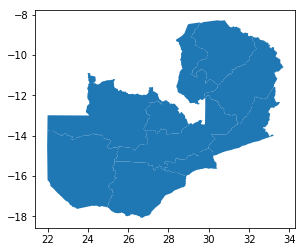

In [44]:
zambia_dist = gpd.read_file("zmb_popa_adm1_census2010f_ISCGM_CSO_OCHA_.shp")
zambia_dist.plot()

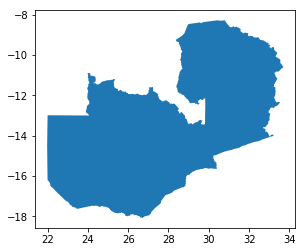

In [58]:
zambia = zambia_dist[['COUNTRY', 'geometry']]
zambia = zambia.dissolve(by = "COUNTRY")
zambia.plot()

# with fiona.open("tests/data/box.shp", "r") as shapefile:
#     features = [feature["geometry"] for feature in shapefile]

In [59]:
zambia.to_file('zambia.shp')

In [76]:
with fiona.open("zambia.shp", "r") as shapefile:                                #<--- Need to figure out how to get the geometry from shp file directly 
    features = [feature["geometry"] for feature in shapefile]

with rasterio.open("F182013.v4c.pct_lights.tif") as src:                        #<--- Need to figure out how to get it not to write to a file, but just store in memory at this point
    out_image, out_transform = rasterio.mask.mask(src, features, crop=True)
    out_meta = src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
with rasterio.open("dmsp13_zambia.tif", "w", **out_meta) as dest:
    dest.write(out_image)  

In [77]:
dmsp13_zambia = rasterio.open('RGB.byte.masked.tif')

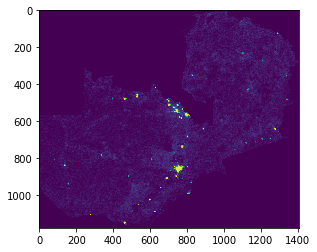

In [78]:
%matplotlib inline
plot.show(dmsp13_zambia)

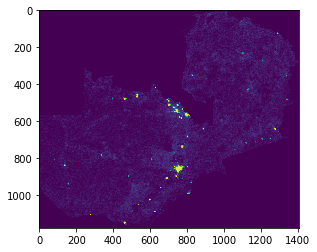

In [80]:
with fiona.open("zambia.shp", "r") as shapefile:                                #<--- Need to figure out how to get the geometry from shp file directly 
    features = [feature["geometry"] for feature in shapefile]

with rasterio.open("F182013.v4c.avg_lights_x_pct.tif") as src:                        #<--- Need to figure out how to get it not to write to a file, but just store in memory at this point
    out_image, out_transform = rasterio.mask.mask(src, features, crop=True)
    out_meta = src.meta.copy() 

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
with rasterio.open("dmsp13_zambia.xpct.tif", "w", **out_meta) as dest:
    dest.write(out_image)

# to make clearer, make variable called shape file 
# to make variable called night files 
    
dmsp13_zambia_xpct = rasterio.open('dmsp13_zambia.xpct.tif')

%matplotlib inline
plot.show(dmsp13_zambia)